#**The Quantum code to Rigetti's QPU and QVM**

the below code is the code where i execute the results from the simulation or the quantum computer itself - by definiton of get_qc.
you can execute the code and get the results of the simulation.

In [ ]:
############## 13 qubits ##############
 
import scipy.special as sc
import numpy as np
from pyquil import Program
from pyquil import get_qc
from pyquil.gates import *
 
n = 13 #number of qubits
s = 50000 #number of measurements
k = 4 # the angle around X to make a different state for the qubit
l = 4  # the angle around Y to make a different state for the qubit
 
RESULTS = []
 
for j in range (l):
    for w in range(k):
        p = Program()
        qc =get_qc("Aspen-8", as_qvm=True) #to use the QVM, just add "as_qvm=True"
        ro = p.declare('ro', 'BIT', n)
        for i in range(n):
            p += RY(45 * j * np.pi/180, i)
            p += RX(45 * w * np.pi/180, i)
            
        for i in range(n):
            p += MEASURE(i, ro[i])
            
        p.wrap_in_numshots_loop(s)
 
        compiled_program =qc.compile(p)
        results_rot = qc.run(compiled_program)
        RESULTS.append(results_rot)
 
#saving the 3 dimentional tensor
with open('results' + str(j) + ' ' + str(w) + '.npy', 'wb') as f:
    np.save(f, RESULTS)

#printing the results
print(RESULTS)

ModuleNotFoundError: ignored

#**The "Double-Qubit Corellation" Code Analysis**

here, i'll first load all the data. you can decide which data you want to see by changing the parameter k in the first row of the code below.

In [ ]:
###### here you can change the k to check every data set ######

k = 1 #0 - simulation ; 1 - the first results of QC ; 2 - the second results of QC

if k == 0:
  res = np.load('/content/drive/My Drive/colab notebooks data/results simulation.npy')
if k == 1:
  res = np.load('/content/drive/My Drive/colab notebooks data/the real results with 6 wrong qubit right dimention.npy')
if k == 2:
  res = np.load('/content/drive/My Drive/colab notebooks data/results new real ASPEN-8 results.npy')


0


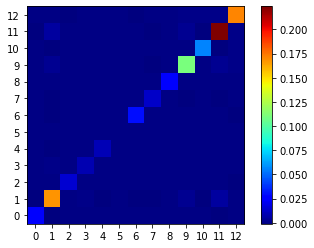

1


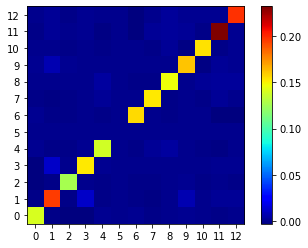

2


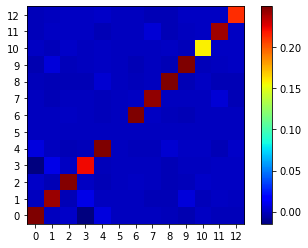

3


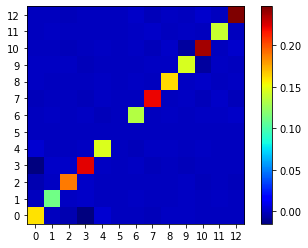

4


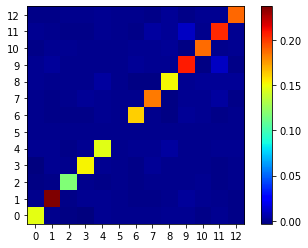

5


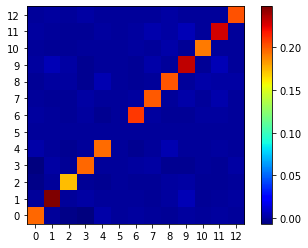

6


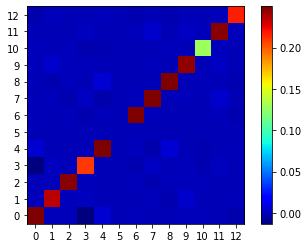

7


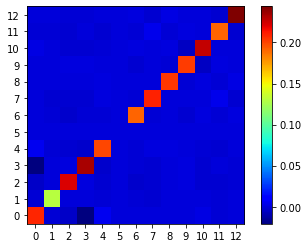

8


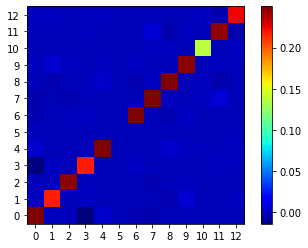

9


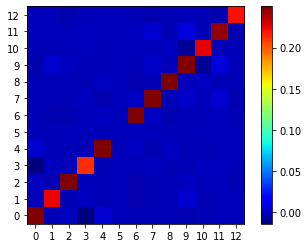

10


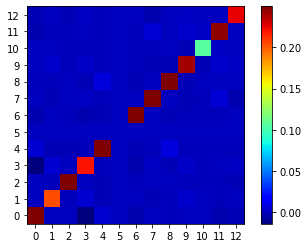

11


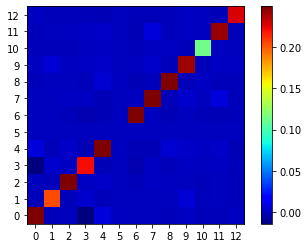

12


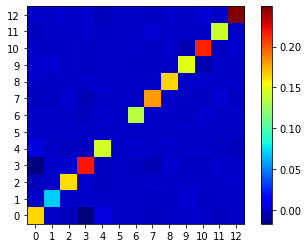

13


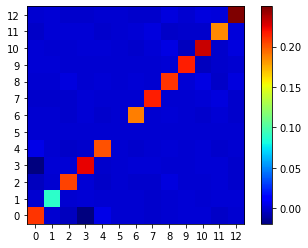

14


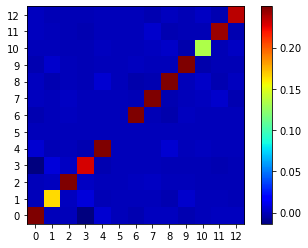

15


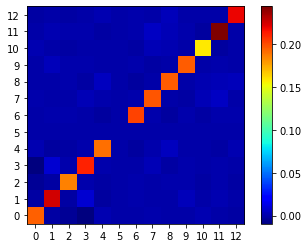

In [ ]:
###### calculating double- corellation and map the results
import scipy as sc
import matplotlib.pyplot as plt

s = 50000
n = 13    
MULTI = np.ones((s,1))
ANGLE_AVERAGE = np.ones((2, s, n))

for z in range(0, 16):
    CORREL =[]
    for i in range(0,n): #now calculating the correlaction
        CORREL_COL = []
        for l in range(0,n):
            MULTI[:,0] = res[z, :, i]*res[z, :, l]
            AVERAGE_MULTI = np.average(MULTI)

            X = np.average(res[z, :, i])
            Y = np.average(res[z, :, l])
            MULTI_AVERAGE = X*Y
            CORREL_COL.append((AVERAGE_MULTI-MULTI_AVERAGE))
        CORREL.append(CORREL_COL)

    print(z)
    plt.figure()
    plt.imshow(CORREL, cmap='jet', interpolation='nearest')
    plt.gca().invert_yaxis()
    plt.xticks(np.arange(0, 13, 1.0))
    plt.yticks(np.arange(0, 13, 1.0))
    plt.colorbar()
    plt.show()

#**Checking if the theory overlapping the experiments**

0 0.0 pi 0.0 pi
11
0.91


<Figure size 432x288 with 0 Axes>

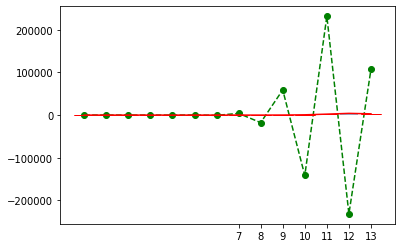

1 0.0 pi 0.25 pi
11
0.91


<Figure size 432x288 with 0 Axes>

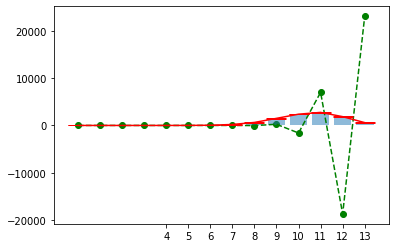

2 0.0 pi 0.5 pi
16
0.96


<Figure size 432x288 with 0 Axes>

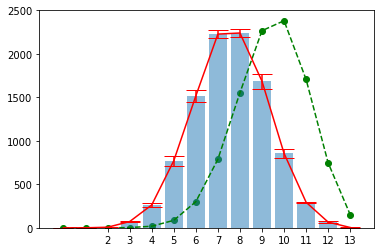

3 0.0 pi 0.75 pi
40
1.2


<Figure size 432x288 with 0 Axes>

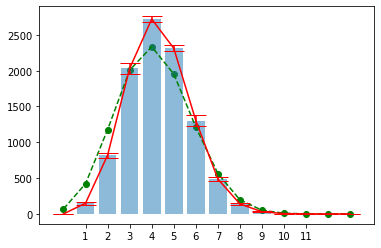

4 0.25 pi 0.0 pi
8
0.88


<Figure size 432x288 with 0 Axes>

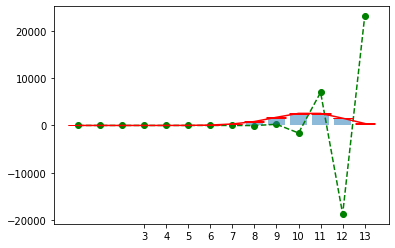

5 0.25 pi 0.25 pi
16
0.96


<Figure size 432x288 with 0 Axes>

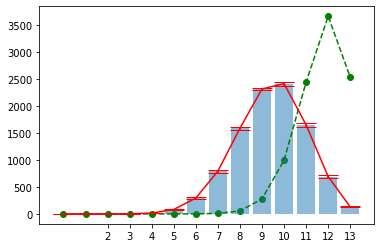

6 0.25 pi 0.5 pi
27
1.07


<Figure size 432x288 with 0 Axes>

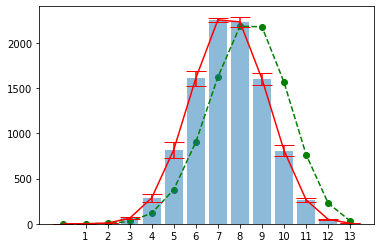

7 0.25 pi 0.75 pi
28
1.08


<Figure size 432x288 with 0 Axes>

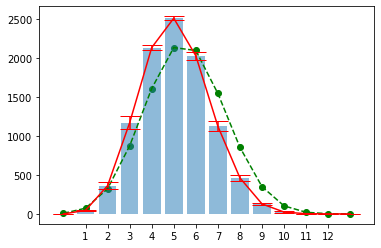

8 0.5 pi 0.0 pi
14
0.9400000000000001


<Figure size 432x288 with 0 Axes>

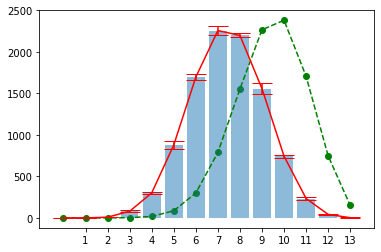

9 0.5 pi 0.25 pi
24
1.04


<Figure size 432x288 with 0 Axes>

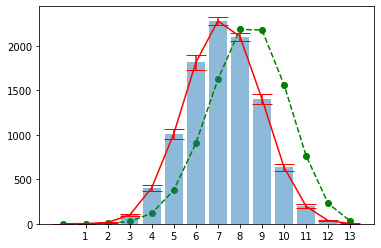

10 0.5 pi 0.5 pi
32
1.12


<Figure size 432x288 with 0 Axes>

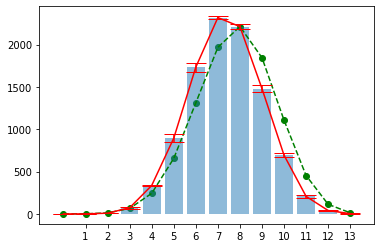

11 0.5 pi 0.75 pi
24
1.04


<Figure size 432x288 with 0 Axes>

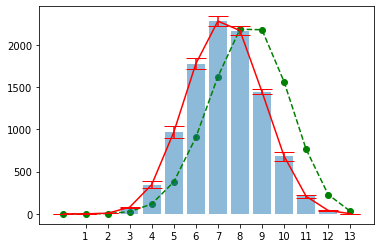

12 0.75 pi 0.0 pi
37
1.17


<Figure size 432x288 with 0 Axes>

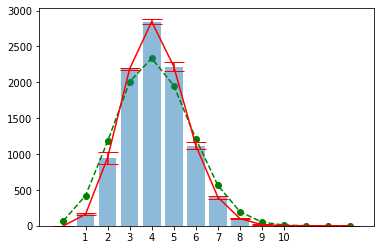

13 0.75 pi 0.25 pi
26
1.06


<Figure size 432x288 with 0 Axes>

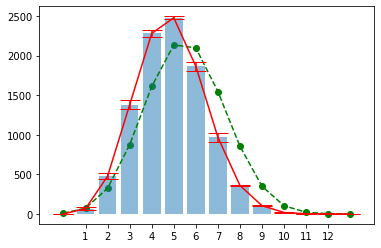

14 0.75 pi 0.5 pi
24
1.04


<Figure size 432x288 with 0 Axes>

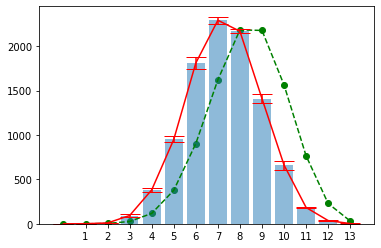

15 0.75 pi 0.75 pi
15
0.95


<Figure size 432x288 with 0 Axes>

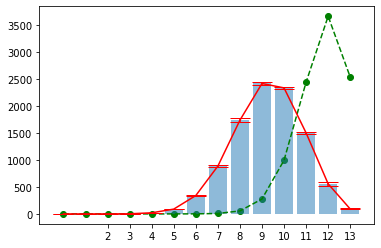

In [ ]:
import scipy.special as sc

###### at each angle i check each epsilon "error" of the equation formulation
###### in order to see if it corresponds to the qvm itself.

z = 0 
for l in range(4):
    for m in range(4):
        z_bin = np.linspace(0.8,1.2,41)
        diff_ave = np.zeros([41,1])
        for o in range(len(z_bin)):
            res2 = np.ones([50000,1])

            for j in range(50000):
                res2[j] = np.count_nonzero(res[z,j,:] == 0)

            ent = np.zeros([5,14])
            err = np.zeros([14,])

            for i in range(0,5):
                entries1, edges1, _ = plt.hist(res2[10000*i:10000*(i+1)], bins=np.arange(15)-0.5,fill=False, linewidth=0)
                ent[i,:] = entries1[:]  
            num_fac = np.average(np.sum(ent, axis = 1))
            ave = np.mean(ent, axis=0)
            err = np.std(ent, dtype=np.float64, axis = 0)
            
            num = 10000*sc.binom(13,np.arange(14))*(((np.cos((45 * l * np.pi/180 + 45 * m * np.pi/180)/2)**2+(np.cos((45 * l * np.pi/180 - 45 * m * np.pi/180)/2)**2)))**np.arange(14))*(((np.sin((45 * l * np.pi/180 + 45 * m * np.pi/180)/2)**2+(np.sin((45 * l * np.pi/180 - 45 * m * np.pi/180)/2)**2)))**(13-np.arange(14)))/2**13
            prob = (np.cos((45 * l * np.pi/180 + 45 * m * np.pi/180)/2)**2+np.cos((45 * l * np.pi/180 - 45 * m * np.pi/180)/2))*z_bin[o]
            
            num_qc = num_fac*sc.binom(13,np.arange(14))*((prob)**(np.arange(14)))*((2-prob)**(13-np.arange(14)))/2**13
            diff_ave[o, 0] = np.average(abs(ave-num_qc))

            
        plt.clf()
        
        print(z, 45 * l /180, 'pi' , 45 * m /180, 'pi')
        z = z + 1
        p = z_bin[diff_ave.argmin()]
        print(diff_ave.argmin())
        print(float(p))
        prob = (np.cos((45 * l * np.pi/180 + 45 * m * np.pi/180)/2)**2+np.cos((45 * l * np.pi/180 - 45 * m * np.pi/180)/2))*z_bin[o]
        #print(np.transpose(diff_ave))
        num_qc = num_fac*sc.binom(13,np.arange(14))*(((prob)**(np.arange(14)))*((2-prob)**(13-np.arange(14))))/2**13

####### with printing the error bar and the mean of the measuremnts - i see who's the epsilon with the average of the smallest absolute
####### difference between the mean of the measurements and the equation - and printing it.
        if k == 0 :
          plt.figure()
          plt.bar(np.arange(14), ave, alpha = 0.5)
          plt.scatter(np.arange(14), num, color = 'green')
          plt.plot(np.arange(14), num, linestyle = '--', color = 'green')
          plt.errorbar(range(14), ave, yerr = err, capsize=10, color = 'red')
          plt.xticks(np.arange(min(res2), max(res2)+1, 1))
          plt.show()
        else :
          plt.figure()
          plt.bar(np.arange(14), ave, alpha = 0.5)
          plt.scatter(np.arange(14), num_qc, color = 'green')
          plt.plot(np.arange(14), num_qc, linestyle = '--', color = 'green')
          plt.errorbar(range(14), ave, yerr = err, capsize=10, color = 'red')
          plt.xticks(np.arange(min(res2), max(res2)+1, 1))
          plt.show()




I want to try a different approach. I want to study by "reverse engineering" - first getting the actual probability by "most likelihood estimation" with binomial distribution, then comparing to the "theoretical probability" by quantum mechanics calculations - and maybe getting to the error estimation.

for $X_1,...,X_N$ binomial random variables, we'll find the probability p by doing:
$\frac{d}{dp}ln(\binom{n}{\widetilde{x}}p^\widetilde{x}(1-p)^{n-\widetilde{x}})=0$
where $\widetilde{x} = \frac{\sum_{i=1}^{N}{X_i}}{N}$


---
$\frac{d}{dp}(ln(\binom{n}{\widetilde{x}})+\widetilde{x}ln(p)+{(n-\widetilde{x})}ln(1-p))=0$

$\frac{\widetilde{x}}{p}-\frac{n-\widetilde{x}}{1-p}=0$

**$p=\frac{\widetilde{x}}{n}=\frac{\sum_{i=1}^{N}{X_i}}{Nn}$** (1)


---
all i'm doing here is calculating the probability by eq. (1) 
and applying to the binomial distribution.

in the next block you can witness how accurate is this simple equation







1.0
0 0.0 pi 0.0 pi
0
0.9160169230769232


<Figure size 432x288 with 0 Axes>

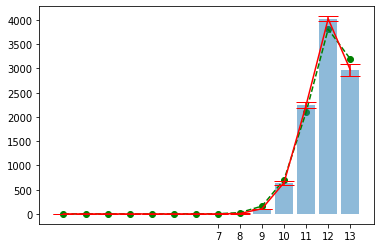

0.8535533905932737
1 0.0 pi 0.25 pi
0
0.8049953846153847


<Figure size 432x288 with 0 Axes>

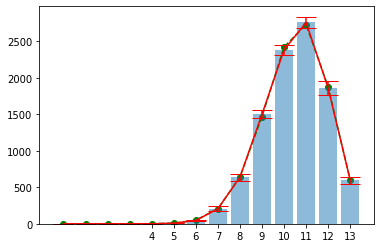

0.5000000000000001
2 0.0 pi 0.5 pi
0
0.58106


<Figure size 432x288 with 0 Axes>

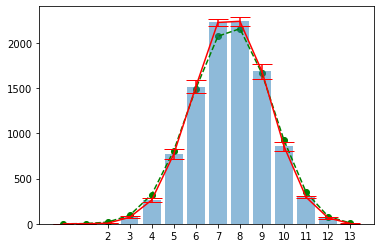

0.1464466094067263
3 0.0 pi 0.75 pi
0
0.33073076923076916


<Figure size 432x288 with 0 Axes>

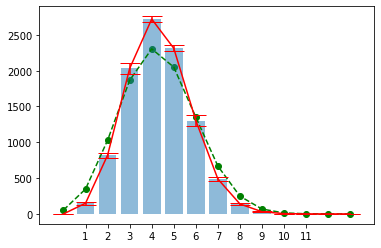

0.8535533905932737
4 0.25 pi 0.0 pi
0
0.7856261538461538


<Figure size 432x288 with 0 Axes>

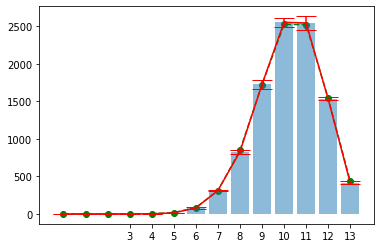

0.75
5 0.25 pi 0.25 pi
0
0.7219523076923077


<Figure size 432x288 with 0 Axes>

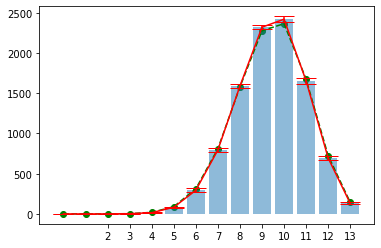

0.5
6 0.25 pi 0.5 pi
0
0.5754400000000001


<Figure size 432x288 with 0 Axes>

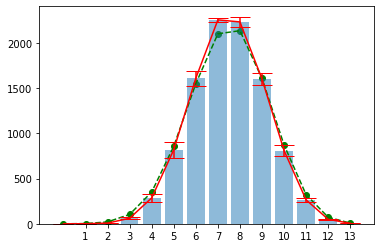

0.25000000000000006
7 0.25 pi 0.75 pi
0
0.3889646153846154


<Figure size 432x288 with 0 Axes>

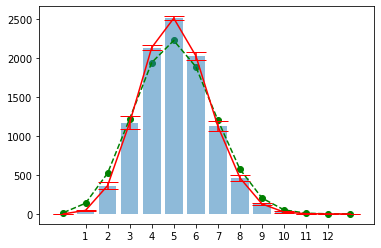

0.5000000000000001
8 0.5 pi 0.0 pi
0
0.5690984615384616


<Figure size 432x288 with 0 Axes>

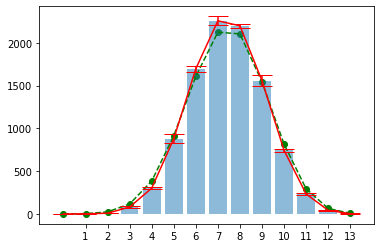

0.5
9 0.5 pi 0.25 pi
0
0.5559876923076923


<Figure size 432x288 with 0 Axes>

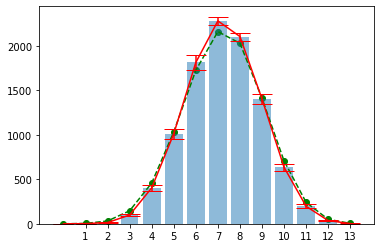

0.5
10 0.5 pi 0.5 pi
0
0.5648646153846154


<Figure size 432x288 with 0 Axes>

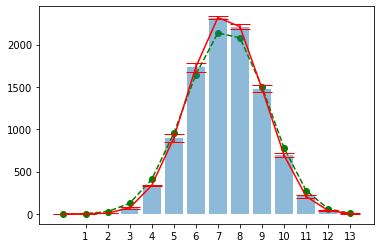

0.5
11 0.5 pi 0.75 pi
0
0.5619876923076923


<Figure size 432x288 with 0 Axes>

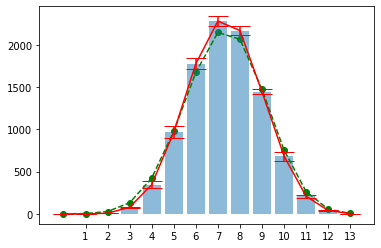

0.1464466094067263
12 0.75 pi 0.0 pi
0
0.31982923076923075


<Figure size 432x288 with 0 Axes>

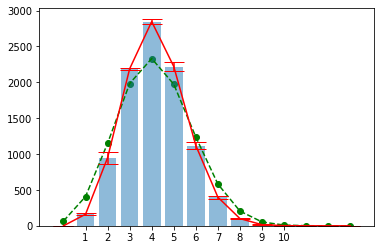

0.25000000000000006
13 0.75 pi 0.25 pi
0
0.374343076923077


<Figure size 432x288 with 0 Axes>

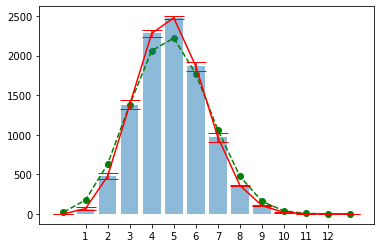

0.5
14 0.75 pi 0.5 pi
0
0.5586153846153845


<Figure size 432x288 with 0 Axes>

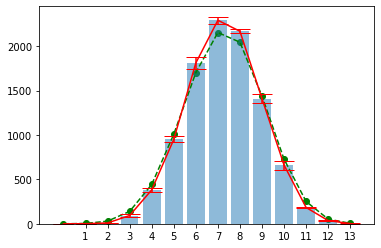

0.75
15 0.75 pi 0.75 pi
0
0.7105584615384616


<Figure size 432x288 with 0 Axes>

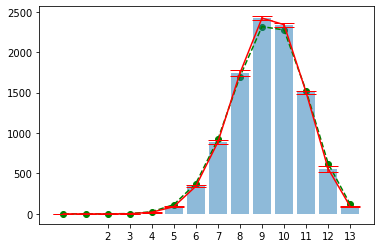

In [ ]:
import scipy as sc

z=0
p_t_array = []
p_array = []
for l in range(4):
  for m in range(4):
      z_bin = np.linspace(0.0,1.0,101)
      diff_ave = np.zeros([101,1])
      #for o in range(len(z_bin)):
      res2 = np.ones([50000,1])

      for j in range(50000):
          res2[j] = np.count_nonzero(res[z,j,:] == 0)

      ent = np.zeros([5,14])
      err = np.zeros([14,])

      for i in range(0,5):
          entries1, edges1, _ = plt.hist(res2[10000*i:10000*(i+1)], bins=np.arange(15)-0.5,fill=False, linewidth=0)
          ent[i,:] = entries1[:]  
      num_fac = np.average(np.sum(ent, axis = 1))
      ave = np.mean(ent, axis=0)
      err = np.std(ent, dtype=np.float64, axis = 0)

      num = 10000*sc.special.binom(13,np.arange(14))*(((np.cos((45 * l * np.pi/180 + 45 * m * np.pi/180)/2)**2+(np.cos((45 * l * np.pi/180 - 45 * m * np.pi/180)/2)**2)))**np.arange(14))*(((np.sin((45 * l * np.pi/180 + 45 * m * np.pi/180)/2)**2+(np.sin((45 * l * np.pi/180 - 45 * m * np.pi/180)/2)**2)))**(13-np.arange(14)))/2**13
      #num_qc = (num_fac**2)*sc.special.binom(13,np.arange(14))*((z_bin[o])**(np.arange(14)))*((1-z_bin[o])**(13-np.arange(14)))/2**13
      diff_ave[o, 0] = np.average(abs(ave-num_qc))
      p_t = np.cos((45 * l * np.pi/180 + 45 * m * np.pi/180)/2)**2+(np.cos((45 * l * np.pi/180 - 45 * m * np.pi/180)/2)**2)
      print(p_t/2)
      p_t_array.append(p_t/2)
      
      plt.clf()
      #figsize = (10,10)
      
      print(z, 45 * l /180, 'pi' , 45 * m /180, 'pi')
      z = z + 1
      count = np.arange(14)
      p = np.sum(ave[:]*count[:])/(10000*13)
      
      print(diff_ave.argmin())
      #print(diff_ave)
      print(float(p))
      p_array.append(p)
      #print(np.transpose(diff_ave))
      num_qc = 10000*sc.special.binom(13,np.arange(14))*((float(p))**(np.arange(14)))*((1-float(p))**(13-np.arange(14)))

      
      plt.figure()
      plt.bar(np.arange(14), ave, alpha = 0.5)
      plt.scatter(np.arange(14), num_qc, color = 'green')
      plt.plot(np.arange(14), num_qc, linestyle = '--', color = 'green')
      plt.errorbar(range(14), ave, yerr = err, capsize=10, color = 'red')
      plt.xticks(np.arange(min(res2), max(res2)+1, 1))
      plt.show()

the green plot and scattered are the probabilities i found via Most Likelihood Estimation (MLE).
now i'll make a graph comparing between the quantum mechanics probability and the MLE probabiliy.

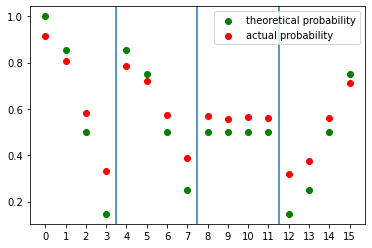

In [ ]:
plt.figure()
plt.scatter(np.arange(16), p_t_array, color = 'green', label='theoretical probability')
plt.scatter(np.arange(16), p_array, color = 'red', label='actual probability')
#plt.scatter(np.arange(16), p_array/p_t_array, color = 'orange', label='difference')
plt.xticks(np.arange(min(np.arange(16)), max(np.arange(16))+1, 1))
plt.axvline(x=3.5)
plt.axvline(x=7.5)
plt.axvline(x=11.5)
plt.legend()
plt.show()

by this scatter graph, i thought of an idea - assuming that for each "RY" operator , the "RX" operators probabilities behave linearily 

$P_{RYRX}\approx m\cdot P_{RX}$

so the error of the actual probability is going to be $\frac{m}{\widetilde{m}}$ where the $m$ is the slope of the quantum mechanics probabilities and $\widetilde{m}$ is the slop of the actual results

In [ ]:
p_array = np.array(p_array)
p_t_array = np.array(p_t_array)

p_array_1 = p_array[0:3]
p_array_2 = p_array[4:7]
p_array_3 = p_array[8:11]
p_array_4 = p_array[12:15]

z_1 = np.polyfit(np.arange(3), p_array_1, 1)
z_2 = np.polyfit(np.arange(3), p_array_2, 1)
z_3 = np.polyfit(np.arange(3), p_array_3, 1)
z_4 = np.polyfit(np.arange(3), p_array_4, 1)


p_t_array_1 = p_t_array[0:3]
p_t_array_2 = p_t_array[4:7]
p_t_array_3 = p_t_array[8:11]
p_t_array_4 = p_t_array[12:15]

z_1t = np.polyfit(np.arange(3), p_t_array_1, 1)
z_2t = np.polyfit(np.arange(3), p_t_array_2, 1)
z_3t = np.polyfit(np.arange(3), p_t_array_3, 1)
z_4t = np.polyfit(np.arange(3), p_t_array_4, 1)

print(p_t_array_1)
print((p_array_1-z_1t[1])/z_1t[0])
print(p_array_1)

z = [z1,z1,z1,z1,z2,z2,z2,z2,z3,z3,z3,z3,z4,z4,z4,z4]
z = np.array(z)

[1.         0.85355339 0.5       ]
[0.4740035  0.91808965 1.81383119]
[0.91601692 0.80499538 0.58106   ]


NameError: ignored

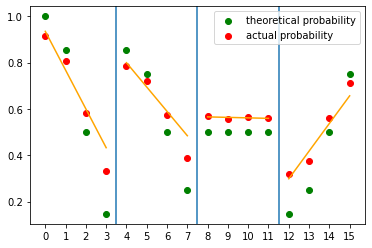

In [ ]:
plt.figure()
plt.scatter(np.arange(16), p_t_array, color = 'green', label='theoretical probability')
plt.scatter(np.arange(16), p_array, color = 'red', label='actual probability')
z1_plt = z_1[0]*np.arange(4)+z_1[1]
z2_plt = z_2[0]*np.arange(4)+z_2[1]
z3_plt = z_3[0]*np.arange(4)+z_3[1]
z4_plt = z_4[0]*np.arange(4)+z_4[1]
plt.plot(np.arange(4), z1_plt, color = 'orange')
plt.plot(np.arange(4)+4, z2_plt, color = 'orange')
plt.plot(np.arange(4)+8, z3_plt, color = 'orange')
plt.plot(np.arange(4)+12, z4_plt, color = 'orange')
plt.xticks(np.arange(min(np.arange(16)), max(np.arange(16))+1, 1))
plt.axvline(x=3.5)
plt.axvline(x=7.5)
plt.axvline(x=11.5)
plt.legend()
plt.show()

there's an article about error mitigation, and in this code first i will find the error of the system $\varepsilon_{i}$ and $\eta_{i}$ by the calibration equation:

\$\varepsilon_{j}=\frac{\sum_{x,y}m(x,y)\langle1|y_{j}\rangle\langle0|x_{j}\rangle}{\sum_{x,y}m(x,y)\langle0|x_{j}\rangle}$

$\eta_{j}=\frac{\sum_{x,y}m(x,y)\langle0|y_{j}\rangle\langle1|x_{j}\rangle}{\sum_{x,y}m(x,y)\langle1|x_{j}\rangle}$

where $m(x,y)$ is the number of rounds with the inpute state x and the measured output state y, as the index j represent the specific qubit.

by my model, the calculations are:

$\langle x_{j}|0\rangle=cos(\phi/2)cos(\theta/2)-isin(\phi/2)sin(\theta/2)$

$\langle x_{j}|1\rangle=cos(\phi/2)sin(\theta/2)-isin(\phi/2)cos(\theta/2)$

since their circuits in article are been selected by benchmark - while i the circuit of the measurement remain constant - the m(x,y) is unnacessary in calculation


In [ ]:
from collections import Counter

error_table = []
res = np.array(res)
index = 0
res2 = np.ones([50000,1])
probability_up = 0
probability_down = 0

for k in range(2):
  probability_each_qubit = []
  for i in range(13):
    index = 0
    for j in range(4):
        for w in range(4):
          if k == 0:
            probability_input = np.sqrt(np.cos(45 * j * np.pi/360)*np.cos(45 * w * np.pi/360)**2+np.sin(45 * j * np.pi/360)*np.sin(45 * w * np.pi/360)**2)
            probability_output = np.count_nonzero(res[index][:][i] == 1)/50000
          if k == 1:
            probability_input = np.sqrt(np.cos(45 * j * np.pi/360)*np.sin(45 * w * np.pi/360)**2+np.sin(45 * j * np.pi/360)*np.cos(45 * w * np.pi/360)**2)
            probability_output = np.count_nonzero(res[index][:][i] == 0)/50000
          probability_up = probability_up + probability_input*probability_output
          probability_down = probability_down + probability_input
          index += 1
    probability_each_qubit.append(probability_up/probability_down)
  error_table.append(probability_each_qubit)
print(error_table)
error_table = np.array(error_table)
print(error_table.shape)


[[8.92257325585447e-05, 0.00010355840969154971, 0.00010211174169912928, 0.00010741123178863777, 0.000107022623191971, 0.0001057445902604482, 0.00010559160468170477, 0.00010401041487240656, 0.00010368863234281709, 0.00010282782751018303, 0.00010180938242685441, 0.00010068052517410931, 0.00010143968621241254], [0.00010490496869770835, 0.00010609536645023902, 0.0001084528250953508, 0.00010910229564964168, 0.00011048218662381513, 0.00011198979992253411, 0.00011332931401440546, 0.00011482638475786312, 0.00011589621159235859, 0.00011703777120169883, 0.0001183963398376919, 0.00011970587077804526, 0.00012012192479373382]]
(2, 13)


after finding $\eta_{j}$ and $\varepsilon_{j}$ , now i'll plug it into the tensor product model:

$A=\begin{bmatrix}
1-\varepsilon_{1} & \eta_{1} \\
\varepsilon_{1} & 1-\eta_{1}
\end{bmatrix}\otimes ...\otimes\begin{bmatrix}
1-\varepsilon_{n} & \eta_{n} \\
\varepsilon_{n} & 1-\eta_{n}
\end{bmatrix}$

In [ ]:
eye_matrix = np.eye(2)
tensor_product = [eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix,eye_matrix]
tensor_product = np.array(tensor_product)
for i in range(13):
  for j in range(2):
    for k in range(2):
      if j == k:
        tensor_product[i, j, k] = tensor_product[i, j, k] - error_table[j, i]
      if j != k:
        tensor_product[i, j, k] = error_table[j, i]
print(tensor_product)

[[[9.99910774e-01 8.92257326e-05]
  [1.04904969e-04 9.99895095e-01]]

 [[9.99896442e-01 1.03558410e-04]
  [1.06095366e-04 9.99893905e-01]]

 [[9.99897888e-01 1.02111742e-04]
  [1.08452825e-04 9.99891547e-01]]

 [[9.99892589e-01 1.07411232e-04]
  [1.09102296e-04 9.99890898e-01]]

 [[9.99892977e-01 1.07022623e-04]
  [1.10482187e-04 9.99889518e-01]]

 [[9.99894255e-01 1.05744590e-04]
  [1.11989800e-04 9.99888010e-01]]

 [[9.99894408e-01 1.05591605e-04]
  [1.13329314e-04 9.99886671e-01]]

 [[9.99895990e-01 1.04010415e-04]
  [1.14826385e-04 9.99885174e-01]]

 [[9.99896311e-01 1.03688632e-04]
  [1.15896212e-04 9.99884104e-01]]

 [[9.99897172e-01 1.02827828e-04]
  [1.17037771e-04 9.99882962e-01]]

 [[9.99898191e-01 1.01809382e-04]
  [1.18396340e-04 9.99881604e-01]]

 [[9.99899319e-01 1.00680525e-04]
  [1.19705871e-04 9.99880294e-01]]

 [[9.99898560e-01 1.01439686e-04]
  [1.20121925e-04 9.99879878e-01]]]
